In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from datetime import datetime
now = datetime.now()

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [3]:
customer_data = pd.read_csv("../Dataset/marketing_campaign.csv", delimiter='\t', index_col='ID', infer_datetime_format=True)

In [4]:
customer_data.shape

(2240, 28)

In [5]:
customer_data.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1


## Attribute Discription

**People**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

In [6]:
customer_data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


> Columns Z_CostContact and Z_Revenue have constant value so we can remove them

In [7]:
customer_data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [8]:
print("Are there any null values?")
print(customer_data.isnull().any())
print("\nTotal number of null values")
print(customer_data.isnull().sum())

Are there any null values?
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Total number of null values
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome         

> There are 24 null values in Income Column, we will deal with null values as we go down the notebook

# Feature Engineering

## Attribute Engineering

In [9]:
#Change Education to categorical
customer_data['Education'] = pd.Categorical(customer_data.Education)

#Calculate age of customer from birth year
customer_data['Age'] = customer_data.Year_Birth.apply(lambda x: 2022 - int(x))

#Calculate number of days since joining
customer_data['Dt_Customer'] = pd.to_datetime(customer_data.Dt_Customer)
customer_data['Days_Since_Customer'] = customer_data.Dt_Customer.apply(lambda x: (now - x).total_seconds()/ (60 * 60 * 24))

#Creating a attribute as family size
marital_map = {'Absurd': 1, 'Alone': 1, 'YOLO': 1, 'Single': 1, 'Married': 2, 'Together': 2, 'Widow': 1, 'Divorced': 1}
customer_data['Marital_Status_Ct'] = customer_data.Marital_Status.map(marital_map)

#Calculate total number of kids
customer_data['Num_Kids'] = customer_data.Kidhome.values + customer_data.Teenhome.values

#Calulate Family size from marital status and kids
customer_data['Family_Size'] = customer_data.Marital_Status_Ct.values + customer_data.Num_Kids.values

#Total number of campaign accepted
customer_data['Tot_Cmp_Accepted'] = customer_data.AcceptedCmp1.values + customer_data.AcceptedCmp2.values + customer_data.AcceptedCmp3.values + customer_data.AcceptedCmp4.values + customer_data.AcceptedCmp5.values

#Total number of minimum items purchased in total
customer_data['Itm_Total'] = customer_data['MntWines'].values + customer_data['MntFruits'].values + customer_data['MntMeatProducts'].values + customer_data['MntFishProducts'].values + customer_data['MntWines'].values + customer_data['MntSweetProducts'].values + customer_data['MntGoldProds'].values

In [10]:
customer_data.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Family_Size,Tot_Cmp_Accepted,Itm_Total
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,3863.854418,1,0,1,0,2252
2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,3017.854418,1,2,3,0,38
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,3364.854418,2,0,2,0,1202
6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,2957.854418,2,1,3,0,64
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,3213.854418,2,1,3,0,595
7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,55,3345.854418,2,1,3,0,1236
965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,51,3645.854418,1,1,2,0,825
6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,37,3380.854418,2,1,3,0,245
4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,48,3440.854418,2,1,3,0,60


In [11]:
customer_data.shape

(2240, 35)

## Removing useless columns 
We will going forward use the dataframe: **customer_data_eng**

In [12]:
customer_data_eng = customer_data.drop(['Dt_Customer', 'Year_Birth', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue', 'Num_Kids', 'Marital_Status'], axis=1, inplace=False)

In [13]:
customer_data_eng.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Family_Size,Tot_Cmp_Accepted,Itm_Total
ID,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,3863.854418,1,1,0,2252
2174,Graduation,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,3017.854418,1,3,0,38
4141,Graduation,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,3364.854418,2,2,0,1202
6182,Graduation,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,2957.854418,2,3,0,64
5324,PhD,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,3213.854418,2,3,0,595


In [14]:
customer_data_eng.shape

(2240, 24)

In [15]:
customer_data_eng.dtypes

Education              category
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
Complain                  int64
Response                  int64
Age                       int64
Days_Since_Customer     float64
Marital_Status_Ct         int64
Family_Size               int64
Tot_Cmp_Accepted          int64
Itm_Total                 int64
dtype: object

## Handling NA values

As **Income** column contains only 24 missing values. Since this only accounts for 1% of the total dataset, imputing the mean will not have great consequences.

In [16]:
imputer = SimpleImputer(missing_values = np.NaN, strategy='mean')
imputer.fit(customer_data_eng.Income.values.reshape(-1,1))
customer_data_eng['Income'] = imputer.transform(customer_data_eng.Income.values.reshape(-1,1))

In [17]:
print("Are there any null values?")
print(customer_data_eng.isnull().any())

Are there any null values?
Education              False
Income                 False
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Complain               False
Response               False
Age                    False
Days_Since_Customer    False
Marital_Status_Ct      False
Family_Size            False
Tot_Cmp_Accepted       False
Itm_Total              False
dtype: bool


# Factor Analysis

## Data Transformation

In [27]:
customer_data_eng.Education.unique()

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Categories (5, object): ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

The only high correlation we see is between total number of items purchased and each kind of item purchased, which stands obvious as there a functional dependency between them.

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('catagoric', OneHotEncoder(), [0]), ('numeric', StandardScaler(), list(range(1, len(customer_data_eng.T))))])

In [31]:
customer_data_eng_transformed = ct.fit_transform(customer_data_eng)

In [66]:
new_columns = ['Edu_Graduation', 'Edu_PhD', 'Edu_Master', 'Edu_Basic', 'Edu_2n Cycle']
columns_name = list(customer_data_eng.columns)[1:]
new_columns.extend(columns_name)

['Edu_Graduation', 'Edu_PhD', 'Edu_Master', 'Edu_Basic', 'Edu_2n Cycle', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age', 'Days_Since_Customer', 'Marital_Status_Ct', 'Family_Size', 'Tot_Cmp_Accepted', 'Itm_Total']


In [33]:
print(customer_data_eng_transformed[0])

[ 0.          0.          1.          0.          0.          0.23532677
 -0.82521765 -0.92989438  0.30703926  0.98378127  1.55157698  1.67970233
  2.46214705  1.4765001   0.84320691  0.34941394  1.40930394  2.51089024
 -0.55078479  0.69390374 -0.09728167  2.38884634  0.98534473  1.97674456
 -1.34687429 -1.75911463 -0.43903713  1.4669731 ]


In [67]:
df = pd.DataFrame(customer_data_eng_transformed, columns = new_columns)

In [68]:
df.head()

,Edu_Graduation,Edu_PhD,Edu_Master,Edu_Basic,Edu_2n Cycle,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Family_Size,Tot_Cmp_Accepted,Itm_Total
0,0.0,0.0,1.0,0.0,0.0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.097282,2.388846,0.985345,1.976745,-1.346874,-1.759115,-0.439037,1.466973
1,0.0,0.0,1.0,0.0,0.0,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.097282,-0.418612,1.235733,-1.667011,-1.346874,0.446548,-0.439037,-0.952725
2,0.0,0.0,1.0,0.0,0.0,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.097282,-0.418612,0.317643,-0.172468,0.742460,-0.656283,-0.439037,0.319420
3,0.0,0.0,1.0,0.0,0.0,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.097282,-0.418612,-1.268149,-1.925433,0.742460,0.446548,-0.439037,-0.924309
4,0.0,0.0,0.0,0.0,1.0,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.097282,-0.418612,-1.017761,-0.822831,0.742460,0.446548,-0.439037,-0.343975


## Adequacy Test

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines whether the model as a whole, as well as each observable variable, is adequate. The variance among all the observable variables is estimated by KMO. Factor analysis is better suited to lower proportions. KMO values vary from 0 to 1. KMO values below 0.6 are deemed insufficient

In [100]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.7980873679135407

The overall KMO for our data is 0.79, which is good. This value indicates that you can proceed with your planned factor analysis.

## Deciding Number of Factors

In [110]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

In [112]:
fa = FactorAnalyzer()
fa.set_params(n_factors=28, rotation=None)
fa.fit(df)
loadings = fa.loadings_

In [113]:
ev, v = fa.get_eigenvalues()

In [114]:
sorted(ev)

[-1.976305947719795e-15,
 -1.0748861162029493e-15,
 3.04793444289952e-16,
 0.2268380294249011,
 0.2439336785621865,
 0.2877108381567804,
 0.35689444423974936,
 0.38661673802094504,
 0.4128608909423546,
 0.43003085882768166,
 0.4699486539618816,
 0.5033002919315753,
 0.5623213917731694,
 0.6183818671077888,
 0.6941504686185234,
 0.8036244910971466,
 0.8198878121132562,
 0.9285545056922883,
 0.9838048476642861,
 1.0272934128255078,
 1.0980850310553618,
 1.2149568480635218,
 1.297096325892136,
 1.37227606895166,
 1.6717546258092313,
 1.7979907094183532,
 2.3922278901623524,
 7.3994592796873535]

Here, we can see only for 10-factors eigenvalues are greater than one. It means we need to choose only 10 factors (or unobserved variables).

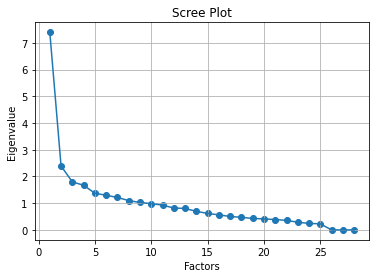

In [115]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1) ,ev)
plt.plot (range(1,df.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt. show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

Here, you can see only for 10-factors eigenvalues are greater than one. It means we need to choose only 10 factors (or unobserved variables).

## Performing Factor Analysis

In [118]:
fa = FactorAnalyzer()
fa.set_params(n_factors=10, rotation="varimax")
fa.fit(df)
loadings = fa.loadings_

In [119]:
pd.DataFrame(fa.loadings_, columns=['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6','Factor7','Factor8','Factor9','Factor10'], index=[df.columns])

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
Edu_Graduation,0.007510,-0.065612,-0.042314,-0.049601,0.018449,0.007087,0.017782,-0.004795,-0.933138,-0.025934
Edu_PhD,-0.116785,-0.120986,0.020321,-0.023105,-0.007402,-0.046148,0.045979,-0.016625,0.033352,0.979979
Edu_Master,0.084722,-0.050671,-0.727594,-0.512436,-0.003045,-0.083702,0.002512,0.002552,0.405235,-0.170398
Edu_Basic,-0.026555,0.049372,-0.042525,0.990013,0.008918,0.045738,-0.018518,0.001781,0.091282,-0.041604
Edu_2n Cycle,-0.041560,0.103411,0.950088,-0.219689,-0.014780,0.064770,-0.014379,0.006732,0.133531,-0.099267
Income,0.684945,0.180239,0.075046,0.008504,0.011603,0.136243,-0.170079,-0.040418,0.055077,-0.093549
Kidhome,-0.522358,-0.181621,-0.045059,0.004807,0.018474,-0.015187,0.076491,0.740143,-0.007514,-0.021918
Teenhome,-0.124111,0.870503,-0.008949,-0.019116,0.033961,-0.158999,0.132679,0.106322,-0.004647,-0.037195
Recency,0.026929,0.026070,-0.013852,-0.020182,0.007838,-0.092643,-0.012103,0.001668,0.010984,0.005742
MntWines,0.688257,0.215102,0.146178,0.029153,0.049444,0.455103,0.146733,-0.176176,0.108622,-0.028380


Income, Amount_of_Wines, Fruits, Meat_Products, Sweet_Products, Fish_Products, Catalog_Purchases, Store_Purchses, Visits_Per_month and Item_Total has highest factor loadings as per Factor_1 analysis.

In [120]:
# Get variance of each factors
fa.get_factor_variance()
pd.DataFrame(fa.get_factor_variance(), columns=['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6','Factor7','Factor8','Factor9','Factor10'], index=['SS Loadings','Proportion Var','Cumulative Var'])

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
SS Loadings,6.390660,1.581735,1.527868,1.307901,1.300025,1.292369,1.210070,1.118751,1.105091,1.029943
Proportion Var,0.228238,0.056491,0.054567,0.046711,0.046429,0.046156,0.043217,0.039955,0.039468,0.036784
Cumulative Var,0.228238,0.284728,0.339295,0.386006,0.432435,0.478591,0.521808,0.561764,0.601231,0.638015


Total ~64% cumulative Variance explained by the 10 factors.